In [1]:
model_name="t5-large"
window_size = 6
overlap = 0
sample = 1

prefix=f"{model_name.replace('/','')}_sample_{sample}"

In [2]:
import RevPrep

In [3]:
from RevPrep.Generation.generate.base import generate , get_model_tokenizer
from RevPrep.Evaluations.scoring import analyse_sentiment, df_sentiment_model, df_sentiment_review, df_sentiments_model, df_sentiments_review, cal_rouge, cal_bert_score, import_bert_scores, cal_readability
from RevPrep.plotting import plot

In [4]:
import pandas as pd

In [5]:
import pickle as pkl
import glob
from tqdm.notebook import tqdm 

In [6]:
sample_big = pkl.load(open(f"benchmark_sample{sample}_big.pkl","rb"))
sample_small = pkl.load(open(f"benchmark_sample{sample}_small.pkl","rb"))

In [7]:
model, tokenizer = get_model_tokenizer(model_name)

PyTorch version 1.6.0 available.
TensorFlow version 2.3.1 available.
/home/science/anaconda3/envs/tr_pegasus_env/lib/python3.7/site-packages/transformers/modeling_auto.py:766: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  FutureWarning,


In [8]:
results_window = generate(model_name, sample_big, model, tokenizer, True, window_size, overlap)

In [9]:
pkl.dump(results_window, open(f"{prefix}.pkl","wb"))

In [7]:
results_window = pkl.load(open(f"{prefix}.pkl","rb"))

In [8]:
results_window["compression_rate"]

0.3603544729274684

In [9]:
import importlib
importlib.reload(RevPrep.Evaluations.scoring)
importlib.reload(RevPrep.plotting.plot)

<module 'RevPrep.plotting.plot' from '/mnt/01D64EB52A75D220/Users/Science/Documents/Projekte/MA/sum_models/pegasus/pegasus/transformers/examples/seq2seq/RevPrep/plotting/plot.py'>

In [10]:
test_window = {}
test_window["source_texts"] = []
test_window["generated summaries"] = [] 
for i in range(50):
    test_window["source_texts"].append(results_window["source_texts"][i])
    test_window["generated summaries"].append(results_window["generated summaries"][i])
    

In [11]:
sens = analyse_sentiment(test_window, 5,30)
display(df_sentiments_model(sens))

PyTorch version 1.6.0 available.
TensorFlow version 2.3.1 available.


mae mean               0.306500
mae std dev            0.119290
sum of mae-mean       15.324984
Sum of mae-std-dev    17.527984
dtype: float64

In [11]:
sens = analyse_sentiment(results_window, 6,7)
df_sentiments_model(sens)

mae mean               0.218333
mae std dev            0.196301
sum of mae-mean       65.500000
Sum of mae-std-dev    90.492200
dtype: float64

In [18]:
sens = analyse_sentiment(results_window, 7,8)
df_sentiments_model(sens)

mae mean                0.247619
mae std dev             0.180073
sum of mae-mean        74.285700
Sum of mae-std-dev    105.947500
dtype: float64

In [19]:
sens = analyse_sentiment(results_window, 9,10)
df_sentiments_model(sens)

mae mean                0.255926
mae std dev             0.164229
sum of mae-mean        76.777800
Sum of mae-std-dev    114.340000
dtype: float64

In [20]:
sens = analyse_sentiment(results_window, 10,11)
df_sentiments_model(sens)

mae mean                0.277000
mae std dev             0.165442
sum of mae-mean        83.100000
Sum of mae-std-dev    117.974600
dtype: float64

In [17]:
sens = analyse_sentiment(results_window, 11,12)
df_sentiments_model(sens)

mae mean                0.282424
mae std dev             0.163180
sum of mae-mean        84.727300
Sum of mae-std-dev    120.260900
dtype: float64

In [21]:
sens = analyse_sentiment(results_window, 29,30)
df_sentiments_model(sens)

mae mean                0.367816
mae std dev             0.108254
sum of mae-mean       110.344800
Sum of mae-std-dev    140.397100
dtype: float64

In [22]:
sens = analyse_sentiment(results_window, 39,40)
df_sentiments_model(sens)

mae mean                0.388632
mae std dev             0.092541
sum of mae-mean       116.589700
Sum of mae-std-dev    143.368900
dtype: float64

In [23]:
sens = analyse_sentiment(results_window, 49,50)
df_sentiments_model(sens)

mae mean                0.405442
mae std dev             0.091592
sum of mae-mean       121.632700
Sum of mae-std-dev    144.487700
dtype: float64

In [11]:
sens = analyse_sentiment(results_window, 560,561)
df_sentiments_model(sens)

RuntimeError: CUDA out of memory. Tried to allocate 870.00 MiB (GPU 0; 7.79 GiB total capacity; 1.78 GiB already allocated; 571.38 MiB free; 2.51 GiB reserved in total by PyTorch)

#### Plot the Means, created by the model of each summary gen and original

In [ ]:
plot.plot_sentiment_means([sens[5], sens[6], sens[17], sens[22]], first_n=30)

### Plot the sentiment function of each summary gen and original 

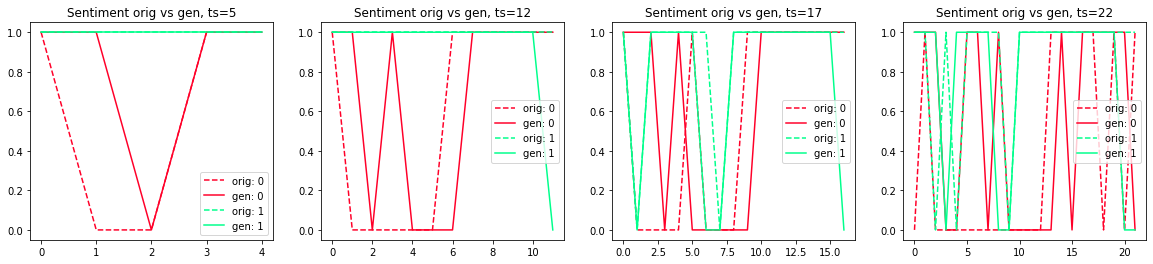

In [12]:
plot.plot_sentiment_functions([sens[5], sens[12], sens[17], sens[22]], first_n=2)

### Plot the progress of the mean squared error, which shows the deviation of both functions

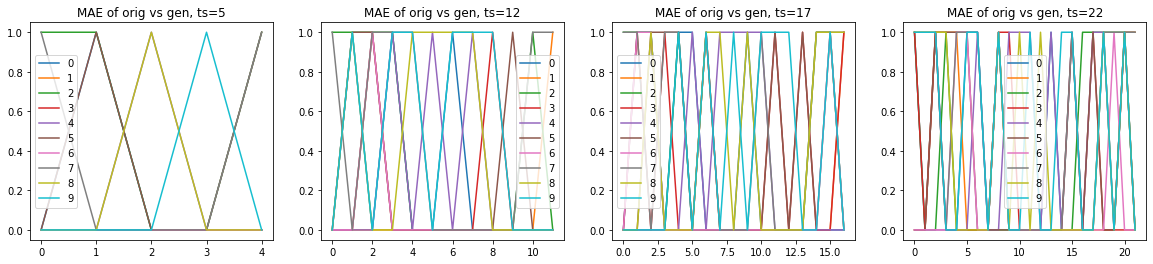

In [13]:
plot.plot_sentiment_mae([sens[5], sens[12], sens[17], sens[22]], first_n=10)

### Print how each summary has been sentimented for gen and original and take the mean of these values. This is an indicator, whether the generated review has the same sentiment as the original in average (without information if the different sentiments are well pictured, for this, see below)

In [11]:
df_sentiments_review(sens)

,means_orig,means_gen,difference
0,0.578730,0.638968,0.060238
1,0.977778,0.977778,0.000000
2,0.079365,0.355714,0.276349
3,1.000000,0.975000,0.025000
4,0.850873,0.905556,0.054683
...,...,...,...
295,0.836984,0.803651,0.033333
296,0.843651,0.788968,0.054683
297,0.632302,0.759524,0.127222
298,0.632302,0.676746,0.044444


### Print the Sum of all Mse-means and Mse-stddev, which will be used for comparing to other models how well the progress of the sentiment is pictured by the generated summary

In [12]:
df_sentiments_model(sens)

mae mean                0.233892
mae std dev             0.179298
sum of mae-mean        70.167700
Sum of mae-std-dev    101.359560
dtype: float64

# Rouge Score 

In [16]:
mean_rouge, std_dev_rouge, _ = cal_rouge(results_window["generated summaries"], results_window["source_texts"])

Target 120 was empty


In [17]:
print(mean_rouge)
print(std_dev_rouge)

{'r1-f1': 0.4160760492497216, 'r1-p': 0.8272919041022718, 'r1-r': 0.2802884296831517, 'r2-f1': 0.2885891112904012, 'r2-p': 0.5736561050813216, 'r2-r': 0.19441031581773877, 'rl-f1': 0.4627816957220719, 'rl-p': 0.8297393739751283, 'rl-r': 0.32310908998589755}
{'r1-f1': 0.06859951415623308, 'r1-p': 0.0673130665513786, 'r1-r': 0.054589957706480334, 'r2-f1': 0.06115328300367667, 'r2-p': 0.08666904164985637, 'r2-r': 0.046218158559334074, 'rl-f1': 0.07072547122558336, 'rl-p': 0.07069232858217772, 'rl-r': 0.0597440047029781}


# Bert-Score 

In [18]:
cal_bert_score(results_window["generated summaries"], results_window["source_texts"], prefix=prefix)
mean_bs, stddev_bs, _ = import_bert_scores(prefix=prefix)
print(mean_bs)
print(stddev_bs)

/home/science/anaconda3/envs/tr_pegasus_env/lib/python3.7/site-packages/transformers/configuration_xlnet.py:211: FutureWarning: This config doesn't use attention memories, a core feature of XLNet. Consider setting `men_len` to a non-zero value, for example `xlnet = XLNetLMHeadModel.from_pretrained('xlnet-base-cased'', mem_len=1024)`, for accurate training performance as well as an order of magnitude faster inference. Starting from version 3.5.0, the default parameter will be 1024, following the implementation in https://arxiv.org/abs/1906.08237
  FutureWarning,



{'f1': 0.7128221, 'p': 0.7942589, 'r': 0.6476197}
{'f1': 0.053079903, 'p': 0.056690797, 'r': 0.048313662}


# Readability

In [19]:
means_rb, std_dev_rb = cal_readability(results_window["generated summaries"], results_window["source_texts"])

# Result Summary: 

In [24]:
mean_orig_avg = df_sentiments_review(sens).agg("mean")["means_orig"]
mean_gen_avg = df_sentiments_review(sens).agg("mean")["means_gen"]
mean_difference = df_sentiments_review(sens).agg("mean")["difference"]
stddev_difference = df_sentiments_review(sens).agg("std")["difference"]

In [25]:
sum_mae = df_sentiments_model(sens)["sum of mae-mean"]
sum_std_dev_mae_means = df_sentiments_model(sens)["Sum of mae-std-dev"]
mean_mae = df_sentiments_model(sens)["mae mean"]
std_dev_mae_means = df_sentiments_model(sens)["mae std dev"]

In [26]:
r1pm = mean_rouge["r1-p"]
r1rm = mean_rouge["r1-r"]
r1fm = mean_rouge["r1-f1"]

r2pm = mean_rouge["r2-p"]
r2rm = mean_rouge["r2-r"]
r2fm = mean_rouge["r2-f1"]

rlpm = mean_rouge["rl-p"]
rlrm = mean_rouge["rl-r"]
rlfm = mean_rouge["rl-f1"]

r1ps = std_dev_rouge["r1-p"]
r1rs = std_dev_rouge["r1-r"]
r1fs = std_dev_rouge["r1-f1"]

r2ps = std_dev_rouge["r2-p"]
r2rs = std_dev_rouge["r2-r"]
r2fs = std_dev_rouge["r2-f1"]

rlps = std_dev_rouge["rl-p"]
rlrs = std_dev_rouge["rl-r"]
rlfs = std_dev_rouge["rl-f1"]

In [27]:
bspm = mean_bs["p"]
bsrm = mean_bs["r"]
bsfm = mean_bs["f1"]

bsps = stddev_bs["p"]
bsrs = stddev_bs["r"]
bsfs = stddev_bs["f1"]

In [28]:
data_r_m = {"mR1-p": r1pm, "mR1-r": r1rm, "mR1-f1": r1fm, "mR2-p":r2pm, "mR2-r": r2rm," mR2-f1": r2fm, "mRl-p": rlpm, "mRl-r": rlrm, "mRl-f1": rlfm,}

In [29]:
data_r_s = {"sR1-p": r1ps, "sR1-r": r1rs, "sR1-f1": r1fs, "sR2-p":r2ps, "sR2-r": r2rs, "sR2-f1": r2fs, "sRl-p": rlps, "sRl-r": rlrs, "sRl-f1": rlfs}

In [30]:
data_bs = {"bs-mean F1": bsfm, "bs-mean P": bspm, "bs-mean R": bsrm, "bs-std-dev F1": bsfs, "bs-std-dev P": bsps, "bs-std-dev R": bsrs}

In [31]:
data_sentiment = {"Sen. rev. mean orig": mean_orig_avg, "Sen. rev. mean gen": mean_gen_avg, "Sen. rev. diff mean": mean_difference, \
                  "Sen. rev. diff stddev": stddev_difference,
                  "Sen. mae sum": sum_mae, "Sen. mae std.": sum_std_dev_mae_means, "Sen. mae avg": mean_mae, "Sen mae std dev avg": std_dev_mae_means}

In [32]:
results_sen = pd.DataFrame(data=data_sentiment, index=[model_name])

In [33]:
results_rouge_mean = pd.DataFrame(data=data_r_m, index=[model_name])

In [34]:
results_rouge_std_dev = pd.DataFrame(data=data_r_s, index=[model_name])

In [1]:
results_bert = pd.DataFrame(data=data_bs, index=[model_name])

NameError: name 'pd' is not defined

In [36]:
results_rb_means = pd.DataFrame(data=means_rb, index=[model_name])
results_rb_std_dev = pd.DataFrame(data=std_dev_rb, index=[model_name])

In [44]:
pkl.dump(results_sen, open(f"benchmark_results/sentimentanalysis/{prefix}.pkl", "wb"))
pkl.dump(results_rouge_mean, open(f"benchmark_results/rougemean/{prefix}.pkl", "wb"))
pkl.dump(results_rouge_std_dev, open(f"benchmark_results/rougestddev/{prefix}.pkl", "wb"))
pkl.dump(results_bert, open(f"benchmark_results/bertscore/{prefix}.pkl", "wb"))
pkl.dump(results_rb_means, open(f"benchmark_results/readabilitymean/{prefix}.pkl", "wb"))
pkl.dump(results_rb_std_dev, open(f"benchmark_results/readabilitystddev/{prefix}.pkl", "wb"))

In [45]:
results_sen

,Sen. rev. mean orig,Sen. rev. mean gen,Sen. rev. diff mean,Sen. rev. diff stddev,Sen. mae sum,Sen. mae std.,Sen. mae avg,Sen mae std dev avg
t5-large,0.699659,0.700693,0.083008,0.062692,93.106632,126.946768,0.310355,0.138712


In [39]:
results_rouge_mean

,mR1-p,mR1-r,mR1-f1,mR2-p,mR2-r,mR2-f1,mRl-p,mRl-r,mRl-f1
t5-large,0.827292,0.280288,0.416076,0.573656,0.19441,0.288589,0.829739,0.323109,0.462782


In [40]:
results_rouge_std_dev

,sR1-p,sR1-r,sR1-f1,sR2-p,sR2-r,sR2-f1,sRl-p,sRl-r,sRl-f1
t5-large,0.067313,0.05459,0.0686,0.086669,0.046218,0.061153,0.070692,0.059744,0.070725


In [41]:
results_bert

,bs-mean F1,bs-mean P,bs-mean R,bs-std-dev F1,bs-std-dev P,bs-std-dev R
t5-large,0.712822,0.794259,0.64762,0.05308,0.056691,0.048314


In [42]:
results_rb_means

,Flesch ease mean gen,Flesch ease mean orig,Flesch ease mean diff,Flesch grade mean gen,Flesch grade mean orig,Flesch grade mean diff,Dale Chall Readability V2 mean gen,Dale Chall Readability V2 mean orig,Dale Chall Readability V2 mean diff
t5-large,-171.932267,74.536133,248.540267,101.009333,7.657333,93.997333,18.212667,6.2775,12.035367


In [43]:
results_rb_std_dev

,Flesch ease std dev gen,Flesch ease std dev orig,Flesch ease std dev diff,Flesch grade std dev gen,Flesch grade std dev orig,Flesch grade std dev diff,Dale Chall Readability V2 std dev gen,Dale Chall Readability V2 std dev orig,Dale Chall Readability V2 std dev diff
t5-large,142.806674,31.788875,140.099887,54.557628,12.039102,53.927137,6.9736,1.657273,6.794751
